In [9]:
!pip install uncertainties

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from uncertainties import ufloat
from uncertainties.umath import *

# 50 Hz experiment

DC = 0 A

[]
resonance voltage nan+/-nan mV


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


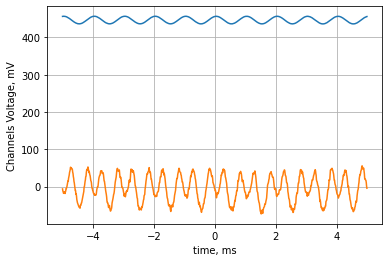

In [16]:
filename = '534.csv'

t, ch1, ch2 = np.genfromtxt(filename, skip_header=46, delimiter=',', 
                     usecols=[1,2,3], unpack=True)

ch1 *=1e3 # mV
ch2 *=1e3 # mV
t *=1e3   # ms

plt.plot(t, ch1)
plt.plot(t, ch2)
plt.grid()
peaks, locs = find_peaks(ch2, height=100, distance=100)
plt.plot(t[peaks], ch2[peaks], 'x')
print(ch1[peaks])
vmean = np.mean(np.abs(ch1[peaks]))
vstd = np.std(np.abs(ch1[peaks]))
v0 = ufloat(vmean, vstd)
plt.axhline(vmean, color='red')
plt.ylabel('Channels Voltage, mV')
plt.xlabel('time, ms')
print(f'resonance voltage {v0} mV')

[ 427.13570595 -477.38695145 -457.28641748  447.23618031  407.03511238
 -477.38695145  427.13570595]
resonance voltage 446+/-25 mV


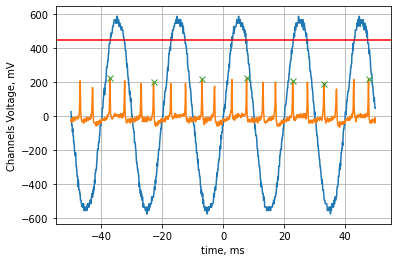

In [4]:
filename = 'Trace 1.csv'

t, ch1, ch2 = np.genfromtxt(filename, skip_header=46, delimiter=',', 
                     usecols=[1,2,3], unpack=True)

ch1 *=1e3 # mV
ch2 *=1e3 # mV
t *=1e3   # ms

plt.plot(t, ch1)
plt.plot(t, ch2)
plt.grid()
peaks, locs = find_peaks(ch2, height=100, distance=100)
plt.plot(t[peaks], ch2[peaks], 'x')
print(ch1[peaks])
vmean = np.mean(np.abs(ch1[peaks]))
vstd = np.std(np.abs(ch1[peaks]))
v0 = ufloat(vmean, vstd)
plt.axhline(vmean, color='red')
plt.ylabel('Channels Voltage, mV')
plt.xlabel('time, ms')
print(f'resonance voltage {v0} mV')

# 1 kHz experiment

DC = 0.539 mA

Wavegen = 1Khz, amplitude 5 Vpp

resonance voltage 448+/-7 mV
cos phi -0.10558727449916677


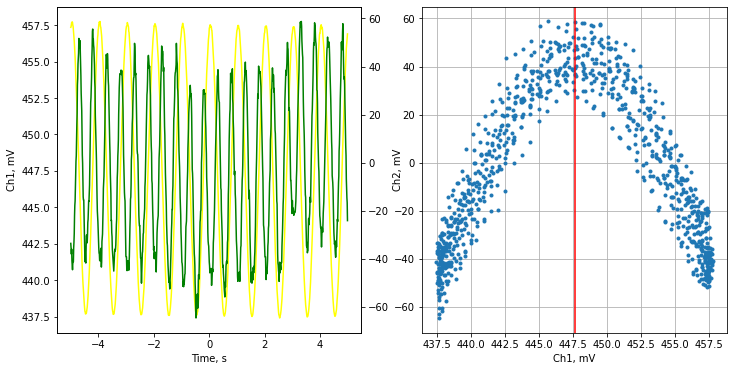

In [19]:
filename = '535.csv'

t, ch1, ch2 = np.genfromtxt(filename, skip_header=46, delimiter=',', 
                     usecols=[1,2,3], unpack=True)
ch1 *=1e3 # mV
ch2 *=1e3 # mV
t *=1e3   # ms

fig, ax = plt.subplots(1,2, figsize=(12, 6))
ax0 = ax[0].twinx()
ax[0].plot(t, ch1, color='yellow')
ax0.plot(t, ch2, color='green')
ax[0].set_xlabel('Time, s')
ax[0].set_ylabel('Ch1, mV')
ax0.set_ylabel('Ch2, mV')

ax[1].plot(ch1, ch2,'.')
ax[1].grid()
vmean = np.mean(ch1)
vstd = np.std(ch1)
v0_2 = ufloat(vmean, vstd)
ax[1].axvline(vmean, color='red')
ax[1].set_xlabel('Ch1, mV')
#ax[1].set_ylabel('Ch2, mV')

print(f'resonance voltage {v0_2} mV')
v12 = ch1 @ ch2
v11 = ch1 @ ch1
v22 = ch2 @ ch2
print(f'cos phi {v12 / np.sqrt(v11 * v22)}')


In [6]:
for current in [534]:
    filename = f'{current}.csv'
    t, ch1, ch2 = np.genfromtxt(filename, skip_header=46, delimiter=',', 
                         usecols=[1,2,3], unpack=True)
    ch1 *=1e3 # mV
    ch2 *=1e3 # mV
    t *=1e3   # ms    
    v12 = ch1 @ ch2
    v11 = ch1 @ ch1
    v22 = ch2 @ ch2
    print(f'{current}: cos {v12 / np.sqrt(v11 * v22):.2f} ch1:{np.mean(ch1):.0f} +- {np.std(ch1):.0f} mV ch2: {np.std(ch2):.0f} mV')    

473: cos 0.58 ch1:393 +- 11 mV ch2: 7 mV
486: cos -0.85 ch1:405 +- 11 mV ch2: 6 mV
488: cos 0.75 ch1:408 +- 12 mV ch2: 6 mV
489: cos -0.49 ch1:409 +- 10 mV ch2: 6 mV
492: cos 0.04 ch1:410 +- 13 mV ch2: 7 mV
495: cos -0.58 ch1:413 +- 9 mV ch2: 6 mV
498: cos -0.77 ch1:415 +- 12 mV ch2: 6 mV
520: cos -0.47 ch1:431 +- 12 mV ch2: 6 mV
539: cos -0.99 ch1:460 +- 9 mV ch2: 7 mV
537: cos -0.63 ch1:445 +- 12 mV ch2: 6 mV


WaveGen Amplitude 2Vpp

resonance voltage 450+/-9 V


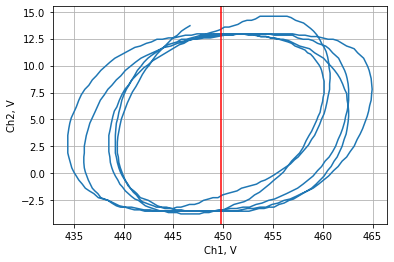

In [7]:
filename = '540.csv'

t, ch1, ch2 = np.genfromtxt(filename, skip_header=46, delimiter=',', 
                     usecols=[1,2,3], unpack=True)
ch1 *=1e3 # mV
ch2 *=1e3 # mV
t *=1e3   # ms

plt.plot(ch1, ch2)
plt.grid()
vmean = np.mean(ch1)
vstd = np.std(ch1)
v0_2 = ufloat(vmean, vstd)
plt.axvline(vmean, color='red')
plt.xlabel('Ch1, V')
plt.ylabel('Ch2, V')


print(f'resonance voltage {v0_2} V')

# Results


In [8]:
print(f'Method 1 (50Hz): resonance voltage {v0_1} V')
print(f'Method 2 (1kHz): resonance voltage {v0_2} V')

NameError: name 'v0_1' is not defined